In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 
import json

import folium
from folium import plugins
from folium.plugins import HeatMap

In [3]:
PATH = "/content/gdrive/My Drive/Colab Notebooks/CS506FinalProject/DMA_refine.csv"

In [4]:
df = pd.read_csv(PATH)
df.head(10)

,Parcel lat,Parcel lon,zipcode,supermarket dist,supermarket walking time,grocery dist,grocery walking time,healthcares dist,healthcares walking time,hospitals dist,hospitals walking time,openspaces dist,openspaces walking time
0,42.232335,-71.129743,2136,2993.0,2221.0,860.0,643.0,1718.0,1351.0,3003.0,2268.0,443.0,337.0
1,42.232159,-71.128829,2136,3131.0,2318.0,999.0,740.0,1857.0,1448.0,3141.0,2365.0,1080.0,794.0
2,42.232633,-71.130628,2136,2892.0,2146.0,759.0,568.0,1617.0,1276.0,2902.0,2193.0,352.0,265.0
3,42.232842,-71.129517,2136,2934.0,2175.0,801.0,597.0,1659.0,1305.0,2944.0,2222.0,407.0,307.0
4,42.232839,-71.132042,2136,2802.0,2075.0,669.0,497.0,1527.0,1204.0,2812.0,2121.0,282.0,211.0
5,42.232967,-71.131394,2136,2771.0,2053.0,639.0,475.0,1497.0,1183.0,2781.0,2100.0,251.0,190.0
6,42.233131,-71.132806,2136,2723.0,2014.0,591.0,436.0,1449.0,1144.0,2733.0,2061.0,252.0,188.0
7,42.233261,-71.130077,2136,2811.0,2088.0,679.0,510.0,1537.0,1218.0,2821.0,2135.0,349.0,262.0
8,42.233430,-71.130827,2136,2822.0,2090.0,681.0,508.0,1548.0,1220.0,2832.0,2137.0,272.0,206.0
9,42.233389,-71.129130,2136,2866.0,2126.0,733.0,548.0,1591.0,1256.0,2876.0,2173.0,394.0,298.0


In [19]:
# test for supermarket
yes = df[df['openspaces walking time'] <= 900]
no = df[df['openspaces walking time'] > 900]

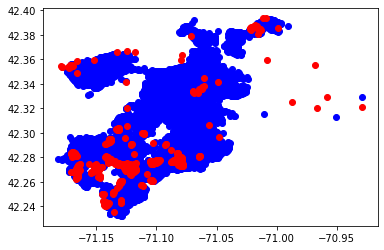

In [20]:
yes_lats = yes['Parcel lat'].to_list()
yes_lons = yes['Parcel lon'].to_list()
no_lats = no['Parcel lat'].to_list()
no_lons = no['Parcel lon'].to_list()

plt.scatter(yes_lons, yes_lats, c='blue')
plt.scatter(no_lons, no_lats, c='red')
plt.show()

In [ ]:
# below: visualize all

In [22]:
# helper functions
def generateBaseMap(default_location =[42.361145, -71.057083]):
  base_map = folium.Map( location=default_location)
  return base_map

def show_on_map(name, yes_lats, yes_lons, no_lats, no_lons, c_yes, c_no):
  """ show the clusterings on map and save as html"""
  """ name: the html file name, a string"""
  """ df: the pandas dataframe"""
  """ c: the color"""
  base_map = generateBaseMap()
  for i in range(len(yes_lats)): # in 15-min
    lat = yes_lats[i]
    lon = yes_lons[i]
    folium.CircleMarker([lat, lon], radius=5, color=c_yes, fill=True, fill_color=c_yes, fill_opacity=0.9).add_to(base_map)
  for i in range(len(no_lats)): # not in 15 min
    lat = no_lats[i]
    lon = no_lons[i]
    folium.CircleMarker([lat, lon], radius=5, color=c_no, fill=True, fill_color=c_no, fill_opacity=0.9).add_to(base_map)
  base_map.save(name)

supermarket
percentage of parcels that are not covered is 0.4678759240911516


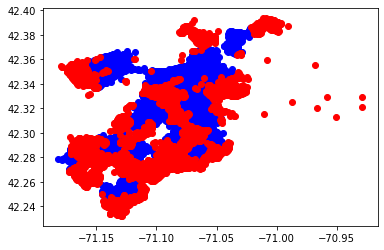

grocery
percentage of parcels that are not covered is 0.029799557960521302


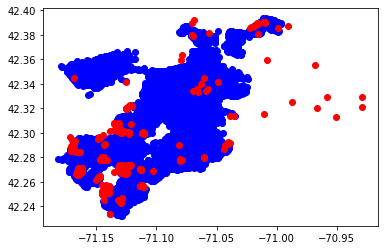

healthcare
percentage of parcels that are not covered is 0.03162868683789345


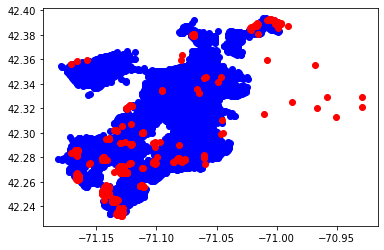

hospital
percentage of parcels that are not covered is 0.47206767776846276


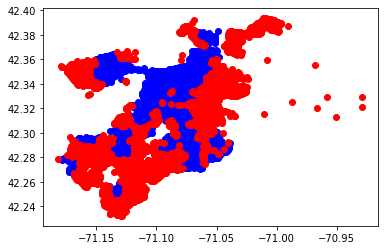

park_and_open_space
percentage of parcels that are not covered is 0.03909762975382974


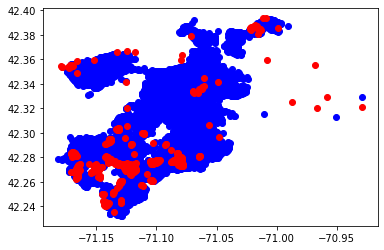

In [24]:
# show things on map
walking_times = ['supermarket walking time', 'grocery walking time', 'healthcares walking time', 'hospitals walking time', 'openspaces walking time']
services = ['supermarket', 'grocery', 'healthcare', 'hospital', 'park_and_open_space']

for i in range(len(walking_times)):
  print(services[i])
  yes = df[df[ walking_times[i] ] <= 900]
  no = df[df[ walking_times[i] ] > 900]
  yes_lats = yes['Parcel lat'].to_list()
  yes_lons = yes['Parcel lon'].to_list()
  no_lats = no['Parcel lat'].to_list()
  no_lons = no['Parcel lon'].to_list()

  yes_num = len(yes_lats)
  no_num = len(no_lats)
  no_percentage = no_num / (yes_num + no_num)
  print("percentage of parcels that are not covered is "+str(no_percentage))

  plt.scatter(yes_lons, yes_lats, c='blue')
  plt.scatter(no_lons, no_lats, c='red')
  plt.show()

  address = "/content/gdrive/My Drive/Colab Notebooks/CS506FinalProject/"+services[i]+".html"
  show_on_map(address, yes_lats, yes_lons, no_lats, no_lons, 'blue', 'red')